In [1]:
import pandas as pd
import numpy as np
from numpy import * 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
#Lee el excel generado en el otro documento .ipynb
ddbb=pd.read_excel("/Github/DecatlonEstadistics/resources/data.xlsx")
del ddbb['1500m NF']

ddbb['Country']=ddbb['Country'].str.lower()

ddbb.columns = ['Position', 'Athlete', 'Age', 'Country', 'Total Points', 'Year', 'Competition', '100m', 
                 '100m Points', 'Lj', 'Lj Points', 'Sp', 'Sp Points', 'Hj', 'Hj Points', '400m', '400m Points', 
                 '110m H', '110m H Points', 'Dt', 'Dt Points', 'Pv', 'Pv Points', 'Jt', 'Jt Points', 
                 '1500m Points', '1500m']

In [3]:
#Coge unicamente los datos de cada prueba y sus puntuaciones 
#Para poder aplicar el algoritmo PCA
ddbbData = ddbb[['100m','100m Points','Lj','Lj Points','Sp','Sp Points',
                 'Hj','Hj Points','400m Points','400m','110m H','110m H Points','Dt','Dt Points',
                 'Pv','Pv Points','Jt','Jt Points','1500m Points','1500m']]

In [4]:
############################################################################
######################## Algoritmo PCA #####################################
############################################################################
pca = PCA(n_components=2)
new = pca.fit_transform(ddbbData)

Text(0.5, 1.0, 'Mayor variación en puntuacion PC2')

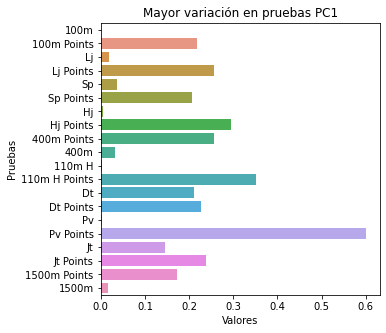

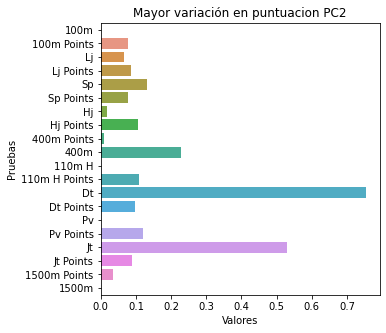

In [5]:
#Muestra la importancia de las caracteristicas en porcentajes
importancia = abs( pca.components_ )
importancia

imp = pd.DataFrame({'Pruebas': ['100m','100m Points','Lj','Lj Points','Sp','Sp Points',
                    'Hj','Hj Points','400m Points','400m','110m H','110m H Points','Dt','Dt Points',
                    'Pv','Pv Points','Jt','Jt Points','1500m Points','1500m'], 'Valores': importancia[0]})


plt.figure(figsize=(5,5))
sns.barplot(x = 'Valores', y = 'Pruebas', data = imp).set_title('Mayor variación en pruebas PC1')

imp = pd.DataFrame({'Pruebas': ['100m','100m Points','Lj','Lj Points','Sp','Sp Points',
                    'Hj','Hj Points','400m Points','400m','110m H','110m H Points','Dt','Dt Points',
                    'Pv','Pv Points','Jt','Jt Points','1500m Points','1500m'], 'Valores': importancia[1]})


plt.figure(figsize=(5,5))
sns.barplot(x = 'Valores', y = 'Pruebas', data = imp).set_title('Mayor variación en puntuacion PC2')

In [6]:
############################################################################
######################## Atleta más joven JJOO #############################
############################################################################

edadMin = 999
aux = 0
pos = 0

for i in ddbb['Age']:
    if(edadMin > i and i!=0):
        edadMin = i
        pos = aux
    aux = aux +1

print("El atleta más joven en participar en unos JJOO es:",ddbb.iloc[pos]['Athlete'], "con", 
      ddbb.iloc[pos]['Age'],"años en el año", ddbb.iloc[pos]['Year'],"en la posicion", ddbb.iloc[pos]['Position'])

El atleta más joven en participar en unos JJOO es: Bob Mathias con 17 años en el año 1948 en la posicion 1


In [7]:
############################################################################
######################## Atleta más mayor JJOO #############################
############################################################################

edadMax = 0
aux = 0
pos = 0

for i in ddbb['Age']:
    if(edadMax < i and i!=0):
        edadMax = i
        pos = aux
    aux = aux +1

print("El atleta más mayor en participar en unos JJOO es:",ddbb.iloc[pos]['Athlete'], "con", 
      ddbb.iloc[pos]['Age'],"años en el año", ddbb.iloc[pos]['Year'],"en la posicion", ddbb.iloc[pos]['Position'])

El atleta más mayor en participar en unos JJOO es: Witold Gerutto con 35 años en el año 1948 en la posicion 19


In [8]:
############################################################################
####################### Atleta más joven en ganar JJOO #####################
############################################################################

edadMin = 999
aux = 0
pos = 0

for i in ddbb['Age']:
    if(edadMin > i and i!=0 and ddbb.iloc[aux]['Position'] == "1"):
        edadMin = i
        pos = aux
    aux = aux +1

print("El atleta más joven en ganr unos JJOO es:",ddbb.iloc[pos]['Athlete'], "con", 
      ddbb.iloc[pos]['Age'],"años en el año", ddbb.iloc[pos]['Year'])

El atleta más joven en ganr unos JJOO es: Jim Thorpe con 24 años en el año 1912


In [9]:
############################################################################
##################### Atleta más mayor en ganar JJOO #######################
############################################################################

edadMax = 0
aux = 0
pos = 0

for i in ddbb['Age']:
    if(edadMax < i and i!=0 and ddbb.iloc[aux]['Position'] == "1"):
        edadMax = i
        pos = aux
    aux = aux +1

print("El atleta más mayor en participar en unos JJOO es:",ddbb.iloc[pos]['Athlete'], "con", 
      ddbb.iloc[pos]['Age'],"años en el año", ddbb.iloc[pos]['Year'])

El atleta más mayor en participar en unos JJOO es: Jim Thorpe con 24 años en el año 1912


In [10]:
############################################################################
##################### Record puntuación en unos JJOO #######################
############################################################################

puntMax = 0
aux = 0
pos = []

for i in ddbb['Total Points']:
    if(puntMax <= i and ddbb.iloc[aux]["Competition"] == 'JJOO'):
        if(puntMax == i):
            pos.append(aux)
        else:
            puntMax = i
            pos.clear()
            pos.append(aux)
    aux = aux+1

for i in pos:
    print("El atleta que posee el recor olímpico es", ddbb.iloc[i]['Athlete'],"con una puntuacion de",
         ddbb.iloc[i]['Total Points'],"en los JJOO del año",ddbb.iloc[i]['Year'])

El atleta que posee el recor olímpico es Roman Å ebrle con una puntuacion de 8893 en los JJOO del año 2004
El atleta que posee el recor olímpico es Ashton Eaton con una puntuacion de 8893 en los JJOO del año 2016


In [11]:
############################################################################
##################### Record puntuación en los WC ##########################
############################################################################

puntMax = 0
aux = 0
pos = []

for i in ddbb['Total Points']:
    if(puntMax <= i and ddbb.iloc[aux]["Competition"] == 'WC'):
        if(puntMax == i):
            pos.append(aux)
        else:
            puntMax = i
            pos.clear()
            pos.append(aux)
    aux = aux+1

for i in pos:
    print("El atleta que posee el recor olímpico es", ddbb.iloc[i]['Athlete'],"con una puntuacion de",
         ddbb.iloc[i]['Total Points'],"en los JJOO del año",ddbb.iloc[i]['Year'])

El atleta que posee el recor olímpico es Ashton Eaton con una puntuacion de 9045 en los JJOO del año 2015


El número de países participantes es 81


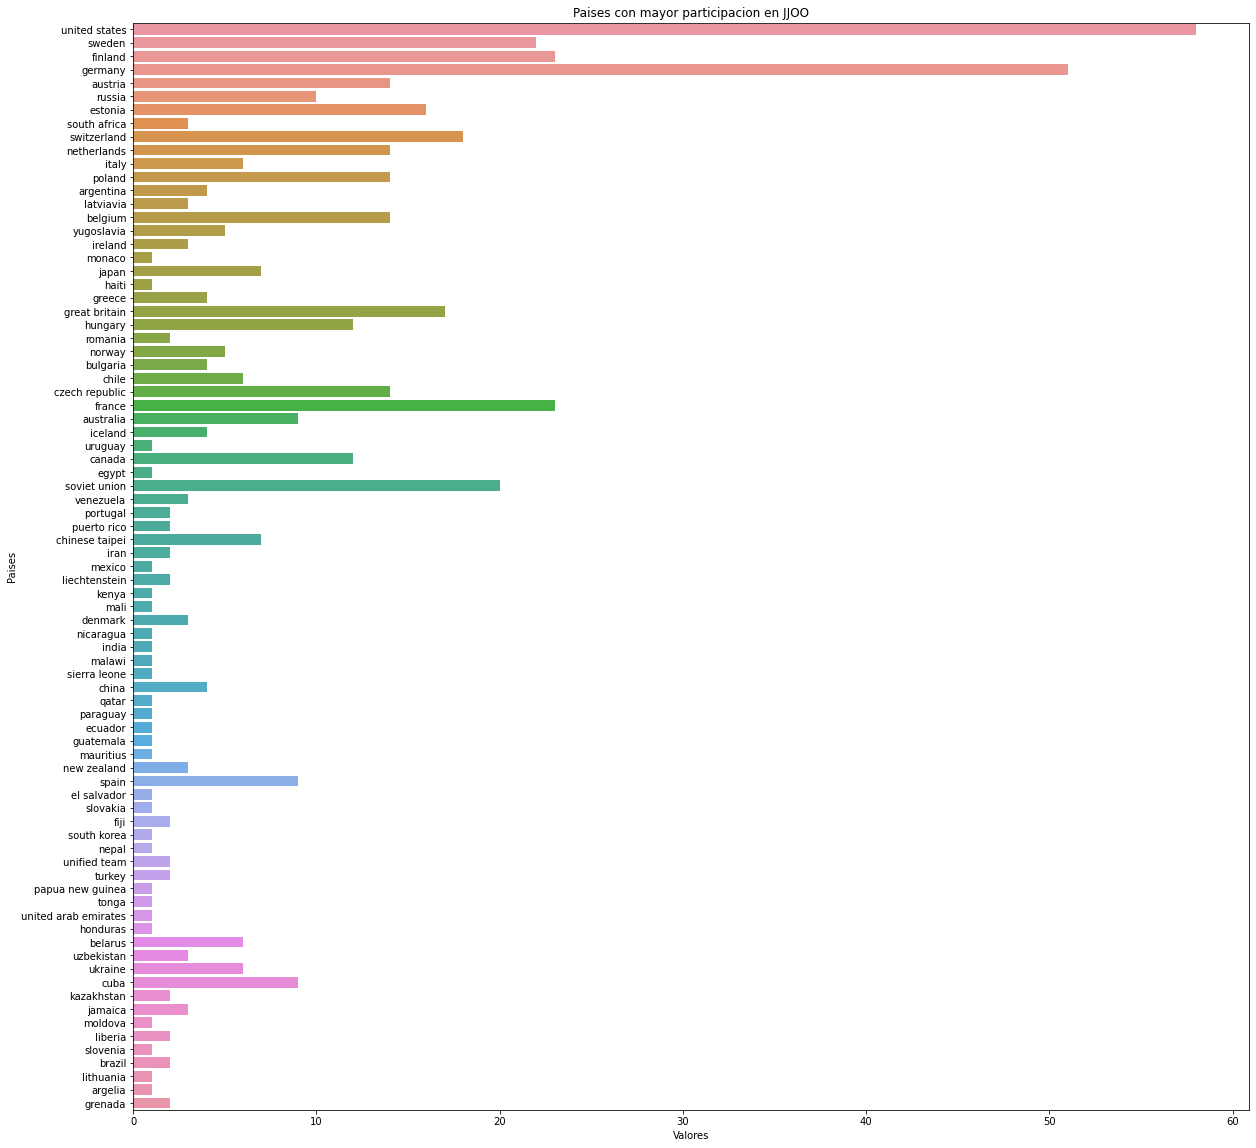

In [12]:
############################################################################
############# Paises con mayor participacion en JJOO #######################
############################################################################

paises = []
cantidad = []

aux = 0
cont = 0

for i in ddbb['Country']:
    if (i not in paises and ddbb.iloc[cont]['Competition'] == "JJOO"):
        paises.append(i)
        cantidad.append(1)
    elif (i in paises and ddbb.iloc[cont]['Competition'] == "JJOO"):
        aux = paises.index(i)
        cantidad[aux] = cantidad[aux] +1
    cont = cont +1
        
imp = pd.DataFrame({'Paises': paises, 'Valores': cantidad})


plt.figure(figsize=(20,20))
sns.barplot(x = 'Valores', y = 'Paises', data = imp).set_title('Paises con mayor participacion en JJOO')

print("El número de países participantes es",len(paises))

El número de países participantes es 48


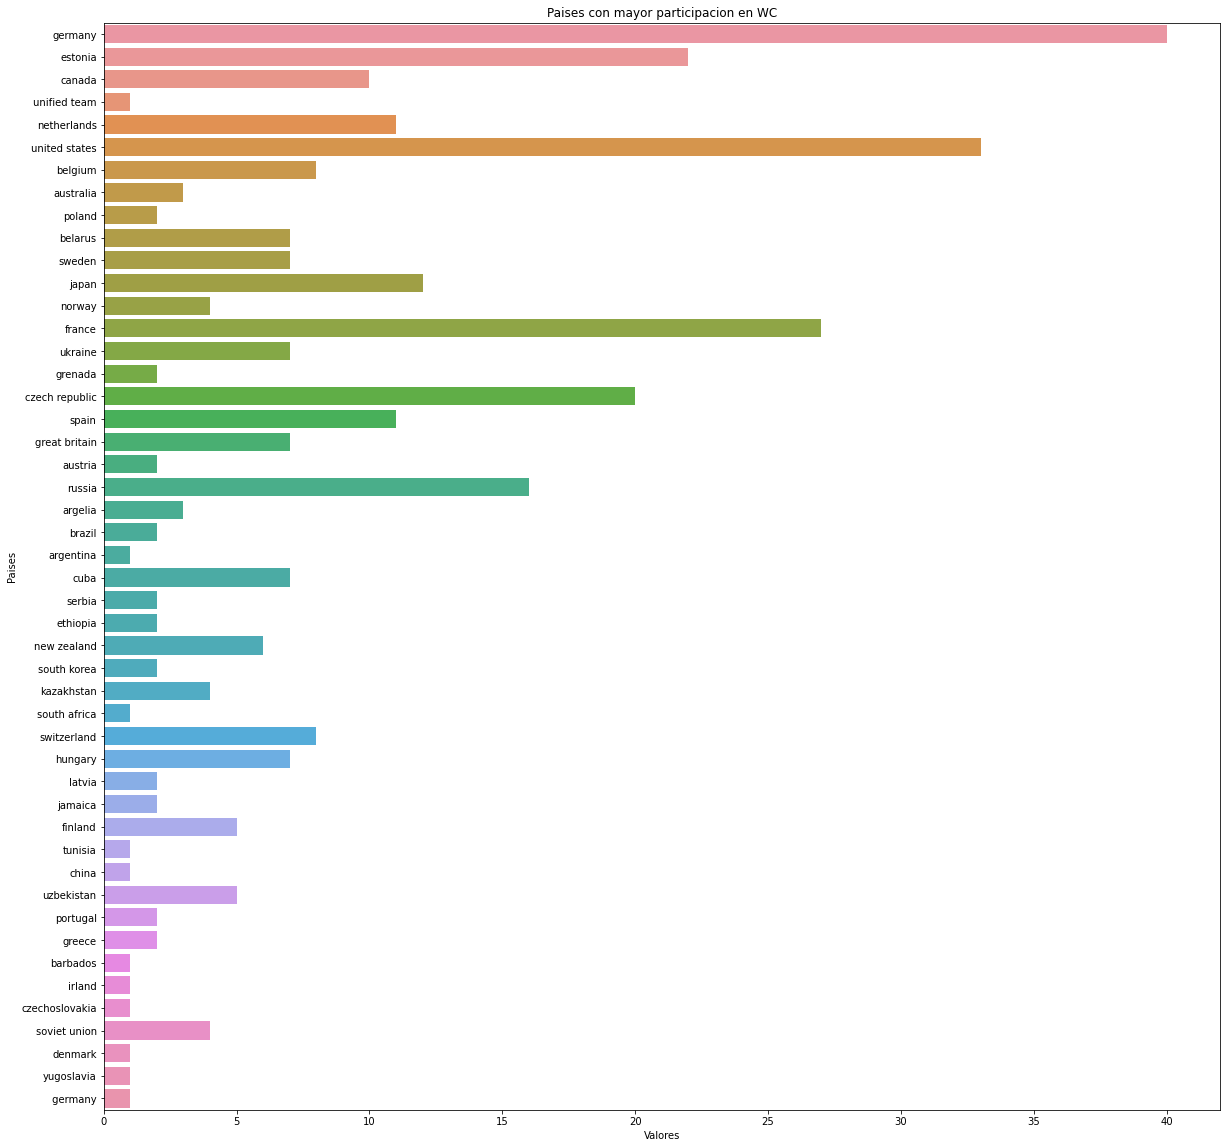

In [13]:
############################################################################
############# Paises con mayor participacion en WC #########################
############################################################################

paises = []
cantidad = []

aux = 0
cont = 0

for i in ddbb['Country']:
    if (i not in paises and ddbb.iloc[cont]['Competition'] == "WC"):
        paises.append(i)
        cantidad.append(1)
    elif (i in paises and ddbb.iloc[cont]['Competition'] == "WC"):
        aux = paises.index(i)
        cantidad[aux] = cantidad[aux] +1
    cont = cont +1
        
imp = pd.DataFrame({'Paises': paises, 'Valores': cantidad})


plt.figure(figsize=(20,20))
sns.barplot(x = 'Valores', y = 'Paises', data = imp).set_title('Paises con mayor participacion en WC')

print("El número de países participantes es",len(paises))

/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 1440x1440 with 0 Axes>

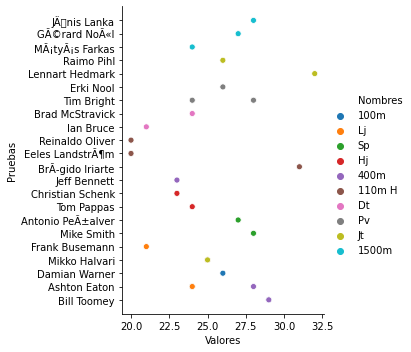

<Figure size 1440x1440 with 0 Axes>

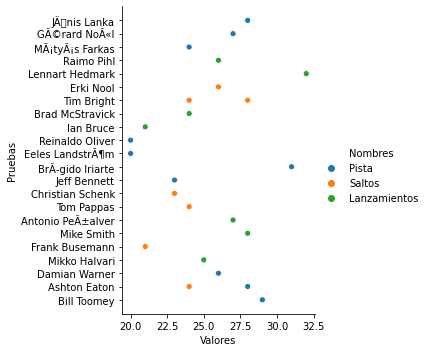

In [14]:
##################################################################################################
#################### Mejore atletas en cada prueba en JJOO para los tres mejores##################
##################################################################################################
maxP = []
aux = 0

###100m
data = ddbb[['Position', 'Athlete', 'Age', 'Country','Year', 'Competition', '100m', '100m Points']]

puntuaciones = [99,99,99]
posiciones = [0,0,0]
pos  = 0

for i in data['100m']:
    if(puntuaciones[0] > i or puntuaciones[1] > i or puntuaciones[2] > i):
        if(data.iloc[pos]['Competition'] == 'JJOO'):
            aux =  puntuaciones.index(max(puntuaciones))
            puntuaciones[aux] = i 
            posiciones[aux] = pos
    pos = pos +1


maxP.append(data.iloc[posiciones[0]])
maxP.append(data.iloc[posiciones[1]])
maxP.append(data.iloc[posiciones[2]])

###Lj
data= ddbb[['Position', 'Athlete', 'Age', 'Country','Year', 'Competition', 'Lj', 'Lj Points']]

puntuaciones = [0,0,0]
posiciones = [0,0,0]
pos  = 0

for i in data['Lj']:
    if(puntuaciones[0] < i or puntuaciones[1] < i or puntuaciones[2] < i):
        if(data.iloc[pos]['Competition'] == 'JJOO'):
            aux =  puntuaciones.index(min(puntuaciones))
            puntuaciones[aux] = i 
            posiciones[aux] = pos
    pos = pos +1


maxP.append(data.iloc[posiciones[0]])
maxP.append(data.iloc[posiciones[1]])
maxP.append(data.iloc[posiciones[2]])

###Sp
data= ddbb[['Position', 'Athlete', 'Age', 'Country','Year', 'Competition', 'Sp', 'Sp Points']]

puntuaciones = [0,0,0]
posiciones = [0,0,0]
pos  = 0

for i in data['Sp']:
    if(puntuaciones[0] < i or puntuaciones[1] < i or puntuaciones[2] < i):
        if(data.iloc[pos]['Competition'] == 'JJOO'):
            aux =  puntuaciones.index(min(puntuaciones))
            puntuaciones[aux] = i 
            posiciones[aux] = pos
    pos = pos +1


maxP.append(data.iloc[posiciones[0]])
maxP.append(data.iloc[posiciones[1]])
maxP.append(data.iloc[posiciones[2]])

###Hj
data= ddbb[['Position', 'Athlete', 'Age', 'Country','Year', 'Competition', 'Hj', 'Hj Points']]

puntuaciones = [0,0,0]
posiciones = [0,0,0]
pos  = 0

for i in data['Hj']:
    if(puntuaciones[0] < i or puntuaciones[1] < i or puntuaciones[2] < i):
        if(data.iloc[pos]['Competition'] == 'JJOO'):
            aux =  puntuaciones.index(min(puntuaciones))
            puntuaciones[aux] = i 
            posiciones[aux] = pos
    pos = pos +1


maxP.append(data.iloc[posiciones[0]])
maxP.append(data.iloc[posiciones[1]])
maxP.append(data.iloc[posiciones[2]])


###400m
data= ddbb[['Position', 'Athlete', 'Age', 'Country','Year', 'Competition', '400m', '400m Points']]

puntuaciones = [99,99,99]
posiciones = [0,0,0]
pos  = 0

for i in data['400m']:
    if(puntuaciones[0] > i or puntuaciones[1] > i or puntuaciones[2] > i):
        if(data.iloc[pos]['Competition'] == 'JJOO'):
            aux =  puntuaciones.index(max(puntuaciones))
            puntuaciones[aux] = i 
            posiciones[aux] = pos
    pos = pos +1


maxP.append(data.iloc[posiciones[0]])
maxP.append(data.iloc[posiciones[1]])
maxP.append(data.iloc[posiciones[2]])

###110m H
data= ddbb[['Position', 'Athlete', 'Age', 'Country','Year', 'Competition', '110m H', '110m H Points']]

puntuaciones = [99,99,99]
posiciones = [0,0,0]
pos  = 0

for i in data['110m H']:
    if(puntuaciones[0] > i or puntuaciones[1] > i or puntuaciones[2] > i):
        if(data.iloc[pos]['Competition'] == 'JJOO'):
            aux =  puntuaciones.index(max(puntuaciones))
            puntuaciones[aux] = i 
            posiciones[aux] = pos
    pos = pos +1


maxP.append(data.iloc[posiciones[0]])
maxP.append(data.iloc[posiciones[1]])
maxP.append(data.iloc[posiciones[2]])

###Dt
data= ddbb[['Position', 'Athlete', 'Age', 'Country','Year', 'Competition', 'Dt', 'Dt Points']]

puntuaciones = [0,0,0]
posiciones = [0,0,0]
pos  = 0

for i in data['Dt']:
    if(puntuaciones[0] < i or puntuaciones[1] < i or puntuaciones[2] < i):
        if(data.iloc[pos]['Competition'] == 'JJOO'):
            aux =  puntuaciones.index(min(puntuaciones))
            puntuaciones[aux] = i 
            posiciones[aux] = pos
    pos = pos +1


maxP.append(data.iloc[posiciones[0]])
maxP.append(data.iloc[posiciones[1]])
maxP.append(data.iloc[posiciones[2]])

###Pv
data= ddbb[['Position', 'Athlete', 'Age', 'Country','Year', 'Competition', 'Pv', 'Pv Points']]

puntuaciones = [0,0,0]
posiciones = [0,0,0]
pos  = 0

for i in data['Pv']:
    if(puntuaciones[0] < i or puntuaciones[1] < i or puntuaciones[2] < i):
        if(data.iloc[pos]['Competition'] == 'JJOO'):
            aux =  puntuaciones.index(min(puntuaciones))
            puntuaciones[aux] = i 
            posiciones[aux] = pos
    pos = pos +1


maxP.append(data.iloc[posiciones[0]])
maxP.append(data.iloc[posiciones[1]])
maxP.append(data.iloc[posiciones[2]])

###Jt
data= ddbb[['Position', 'Athlete', 'Age', 'Country','Year', 'Competition', 'Jt', 'Jt Points']]

puntuaciones = [0,0,0]
posiciones = [0,0,0]
pos  = 0

for i in data['Jt']:
    if(puntuaciones[0] < i or puntuaciones[1] < i or puntuaciones[2] < i):
        if(data.iloc[pos]['Competition'] == 'JJOO'):
            aux =  puntuaciones.index(min(puntuaciones))
            puntuaciones[aux] = i 
            posiciones[aux] = pos
    pos = pos +1


maxP.append(data.iloc[posiciones[0]])
maxP.append(data.iloc[posiciones[1]])
maxP.append(data.iloc[posiciones[2]])

###1500m
data= ddbb[['Position', 'Athlete', 'Age', 'Country','Year', 'Competition', '1500m', '1500m Points']]

puntuaciones = [99,99,99]
posiciones = [0,0,0]
pos  = 0

for i in data['1500m']:
    if(puntuaciones[0] > i or puntuaciones[1] > i or puntuaciones[2] > i):
        if(data.iloc[pos]['Competition'] == 'JJOO'):
            aux =  puntuaciones.index(max(puntuaciones))
            puntuaciones[aux] = i 
            posiciones[aux] = pos
    pos = pos +1


maxP.append(data.iloc[posiciones[0]])
maxP.append(data.iloc[posiciones[1]])
maxP.append(data.iloc[posiciones[2]])


imp = pd.DataFrame({'Pruebas':[maxP[0]['Athlete'],maxP[1]['Athlete'],maxP[2]['Athlete'],
                               maxP[3]['Athlete'],maxP[4]['Athlete'],maxP[5]['Athlete'],
                               maxP[6]['Athlete'],maxP[7]['Athlete'],maxP[8]['Athlete'],
                               maxP[9]['Athlete'], maxP[10]['Athlete'], maxP[11]['Athlete'],
                               maxP[12]['Athlete'],maxP[13]['Athlete'],maxP[14]['Athlete'],
                               maxP[15]['Athlete'],maxP[16]['Athlete'],maxP[17]['Athlete'],
                               maxP[18]['Athlete'],maxP[19]['Athlete'],maxP[20]['Athlete'],
                               maxP[21]['Athlete'],maxP[22]['Athlete'],maxP[23]['Athlete'],
                               maxP[24]['Athlete'],maxP[25]['Athlete'],maxP[26]['Athlete'],
                               maxP[27]['Athlete'],maxP[28]['Athlete'],maxP[29]['Athlete']],
                    'Nombres': ['100m','100m','100m','Lj','Lj','Lj','Sp','Sp','Sp','Hj','Hj','Hj',
                                '400m','400m','400m','110m H','110m H','110m H','Dt','Dt','Dt',
                                'Pv','Pv','Pv','Jt','Jt','Jt','1500m','1500m','1500m'],
                    'Valores': [maxP[0]['Age'],maxP[1]['Age'],maxP[2]['Age'],
                               maxP[3]['Age'],maxP[4]['Age'],maxP[5]['Age'],
                               maxP[6]['Age'],maxP[7]['Age'],maxP[8]['Age'],
                               maxP[9]['Age'], maxP[10]['Age'], maxP[11]['Age'],
                               maxP[12]['Age'],maxP[13]['Age'],maxP[14]['Age'],
                               maxP[15]['Age'],maxP[16]['Age'],maxP[17]['Age'],
                               maxP[18]['Age'],maxP[19]['Age'],maxP[20]['Age'],
                               maxP[21]['Age'],maxP[22]['Age'],maxP[23]['Age'],
                               maxP[24]['Age'],maxP[25]['Age'],maxP[26]['Age'],
                               maxP[27]['Age'],maxP[28]['Age'],maxP[29]['Age']]})


plt.figure(figsize=(20,20))
sns.relplot(x = 'Valores', y= 'Pruebas', hue= 'Nombres', data = imp)

imp = pd.DataFrame({'Pruebas':[maxP[0]['Athlete'],maxP[1]['Athlete'],maxP[2]['Athlete'],
                               maxP[3]['Athlete'],maxP[4]['Athlete'],maxP[5]['Athlete'],
                               maxP[6]['Athlete'],maxP[7]['Athlete'],maxP[8]['Athlete'],
                               maxP[9]['Athlete'], maxP[10]['Athlete'], maxP[11]['Athlete'],
                               maxP[12]['Athlete'],maxP[13]['Athlete'],maxP[14]['Athlete'],
                               maxP[15]['Athlete'],maxP[16]['Athlete'],maxP[17]['Athlete'],
                               maxP[18]['Athlete'],maxP[19]['Athlete'],maxP[20]['Athlete'],
                               maxP[21]['Athlete'],maxP[22]['Athlete'],maxP[23]['Athlete'],
                               maxP[24]['Athlete'],maxP[25]['Athlete'],maxP[26]['Athlete'],
                               maxP[27]['Athlete'],maxP[28]['Athlete'],maxP[29]['Athlete']],
                    'Nombres': ['Pista','Pista','Pista','Saltos','Saltos','Saltos','Lanzamientos','Lanzamientos','Lanzamientos',
                                'Saltos','Saltos','Saltos','Pista','Pista','Pista','Pista','Pista','Pista','Lanzamientos',
                                'Lanzamientos','Lanzamientos','Saltos','Saltos','Saltos','Lanzamientos','Lanzamientos',
                                'Lanzamientos','Pista','Pista','Pista'],
                    'Valores': [maxP[0]['Age'],maxP[1]['Age'],maxP[2]['Age'],
                               maxP[3]['Age'],maxP[4]['Age'],maxP[5]['Age'],
                               maxP[6]['Age'],maxP[7]['Age'],maxP[8]['Age'],
                               maxP[9]['Age'], maxP[10]['Age'], maxP[11]['Age'],
                               maxP[12]['Age'],maxP[13]['Age'],maxP[14]['Age'],
                               maxP[15]['Age'],maxP[16]['Age'],maxP[17]['Age'],
                               maxP[18]['Age'],maxP[19]['Age'],maxP[20]['Age'],
                               maxP[21]['Age'],maxP[22]['Age'],maxP[23]['Age'],
                               maxP[24]['Age'],maxP[25]['Age'],maxP[26]['Age'],
                               maxP[27]['Age'],maxP[28]['Age'],maxP[29]['Age']]})

plt.figure(figsize=(20,20))
sns.relplot(x = 'Valores', y= 'Pruebas', hue= 'Nombres', data = imp)

/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 155 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 155 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 1440x1440 with 0 Axes>

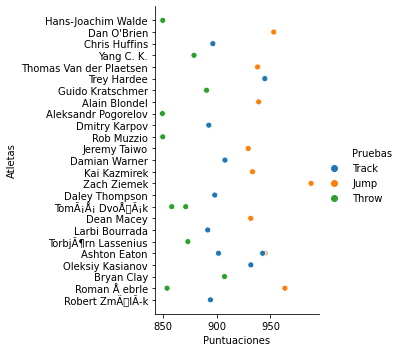

In [15]:
##################################################################################################
#################### Mejore atletas en cada prueba en JJOO para los 10 mejores####################
##################################################################################################
auxTrack = 0
auxJump = 0
auxThrow = 0

pointTrack = []
pointJump = []
pointThrow = []
athleteTrack = []
athleteJump = []
athleteThrow = []

for i in range(len(ddbb)):
    if(ddbb.iloc[i]['Competition']=='JJOO'):
        auxTrack = (ddbb.iloc[i]['100m Points']+ddbb.iloc[i]['400m Points']+ddbb.iloc[i]['110m H Points']+ddbb.iloc[i]['1500m Points'])/4
        auxJump = (ddbb.iloc[i]['Hj Points']+ddbb.iloc[i]['Pv Points']+ddbb.iloc[i]['Lj Points'])/3
        auxThrow = (ddbb.iloc[i]['Dt Points']+ddbb.iloc[i]['Sp Points']+ddbb.iloc[i]['Jt Points'])/3
        if(len(pointTrack)<=10):
            athleteTrack.append(ddbb.iloc[i])
            athleteJump.append(ddbb.iloc[i])
            athleteThrow.append(ddbb.iloc[i])
            pointTrack.append(auxTrack)
            pointJump.append(auxJump)
            pointThrow.append(auxThrow)
        else:
            if(min(pointTrack) < auxTrack):
                pointTrack[pointTrack.index(min(pointTrack))] = auxTrack
                athleteTrack[pointTrack.index(min(pointTrack))] = ddbb.iloc[i]
            if(min(pointJump) < auxJump):
                pointJump[pointJump.index(min(pointJump))] = auxJump
                athleteJump[pointJump.index(min(pointJump))] = ddbb.iloc[i]
            if(min(pointThrow) < auxThrow):
                pointThrow[pointThrow.index(min(pointThrow))] = auxThrow
                athleteThrow[pointThrow.index(min(pointThrow))] = ddbb.iloc[i]
            
atletas = []
puntuaciones = []
pruebas = []
edades = []
anios = []
posiciones = []

for i in range(10):
    atletas.append(athleteTrack[i]['Athlete'])
    puntuaciones.append(pointTrack[i])
    edades.append(athleteTrack[i]['Age'])
    anios.append(athleteTrack[i]['Year'])
    pruebas.append('Track')
    posiciones.append(athleteTrack[i]['Position'])
    atletas.append(athleteJump[i]['Athlete'])
    puntuaciones.append(pointJump[i])
    edades.append(athleteJump[i]['Age'])
    anios.append(athleteJump[i]['Year'])
    pruebas.append('Jump')
    posiciones.append(athleteJump[i]['Position'])
    atletas.append(athleteThrow[i]['Athlete'])
    puntuaciones.append(pointThrow[i])
    edades.append(athleteThrow[i]['Age'])
    anios.append(athleteThrow[i]['Year'])
    pruebas.append('Throw')
    posiciones.append(athleteThrow[i]['Position'])
    
imp = pd.DataFrame({'Pruebas':pruebas,
                    'Puntuaciones':puntuaciones,
                    'Edades':edades,
                    'Anios':anios,
                    'Atletas':atletas,
                    'Posiciones':posiciones})

#Ver que tipo de pruebas dan una mayor puntuacion
plt.figure(figsize=(20,20))
sns.relplot(x = 'Puntuaciones', y= 'Atletas', hue= 'Pruebas', data = imp)

<Figure size 1440x1440 with 0 Axes>

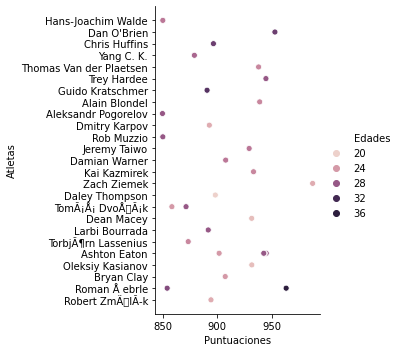

In [16]:
#Ver a que edades consiguen dicha puntuacion
plt.figure(figsize=(20,20))
sns.relplot(x = 'Puntuaciones', y= 'Atletas', hue= 'Edades', data = imp)

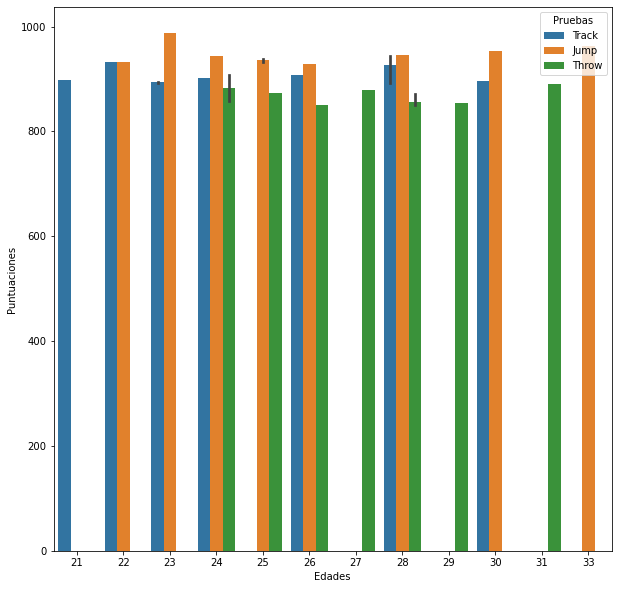

In [17]:
#Como quedarian dichas puntuaciones segun sus edades
plt.figure(figsize=(10,10))
sns.barplot(x = 'Edades', y= 'Puntuaciones', hue= 'Pruebas', data = imp)

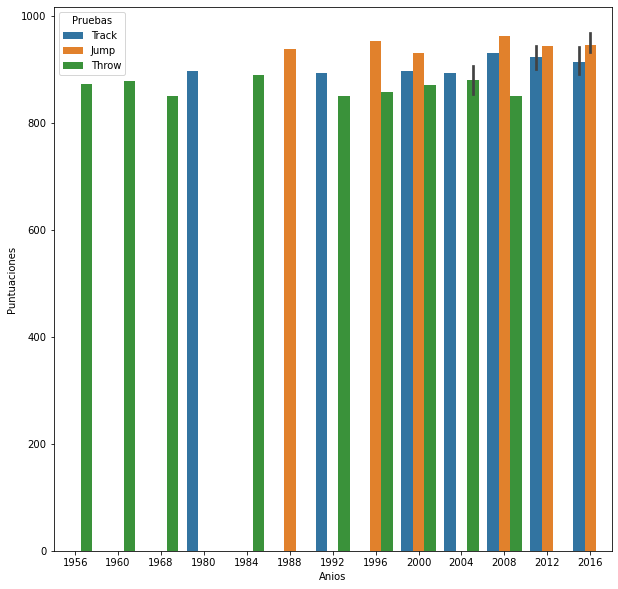

In [18]:
#En que años consiguen esas marcas
plt.figure(figsize=(10,10))
sns.barplot(x = 'Anios', y= 'Puntuaciones', hue= 'Pruebas', data = imp)

In [19]:
#Edad media de los atletas en cada parte
mediaT = 0
mediaJ = 0
mediaTh =0

for i in range(10):
    mediaT = mediaT + athleteTrack[i]['Age']
    mediaJ = mediaJ + athleteJump[i]['Age']
    mediaTh = mediaTh + athleteThrow[i]['Age']
mediaT = mediaT/10
mediaJ = mediaJ/10
mediaTh = mediaTh/10

print("La edad media de los mejores en las pruebas de pista es: ", mediaT)
print("La edad media de los mejores en las pruebas de pista es: ", mediaJ)
print("La edad media de los mejores en las pruebas de pista es: ", mediaTh)

La edad media de los mejores en las pruebas de pista es:  25.3
La edad media de los mejores en las pruebas de pista es:  26.1
La edad media de los mejores en las pruebas de pista es:  27.0


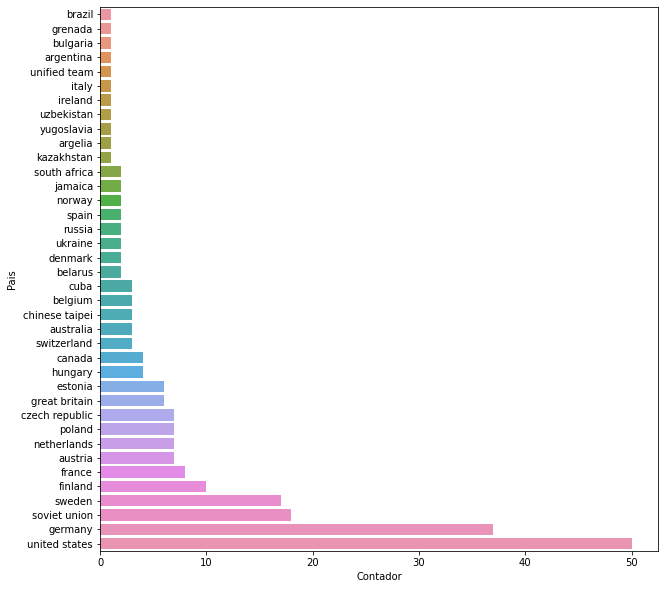

In [20]:
##################################################################################################
#################### Mejores paises entre los 10 mejores en JJOO##################################
##################################################################################################

paises= []
contador= []
aux = 0

for i in range(len(ddbb)):
    if(ddbb.iloc[i]['Position'] <= 10 and ddbb.iloc[i]['Competition'] == 'JJOO'):
        if(ddbb.iloc[i]['Country'] not in paises):
            paises.append(ddbb.iloc[i]['Country'])
            contador.append(1)
        else:
            aux = paises.index(ddbb.iloc[i]['Country'])
            contador[aux] = contador[aux] + 1        


            
imp = pd.DataFrame({'Contador':contador,
                    'Pais':paises})

plt.figure(figsize=(10,10))
sns.barplot(x = 'Contador', y= 'Pais', data = imp, order=imp.sort_values('Contador').Pais)

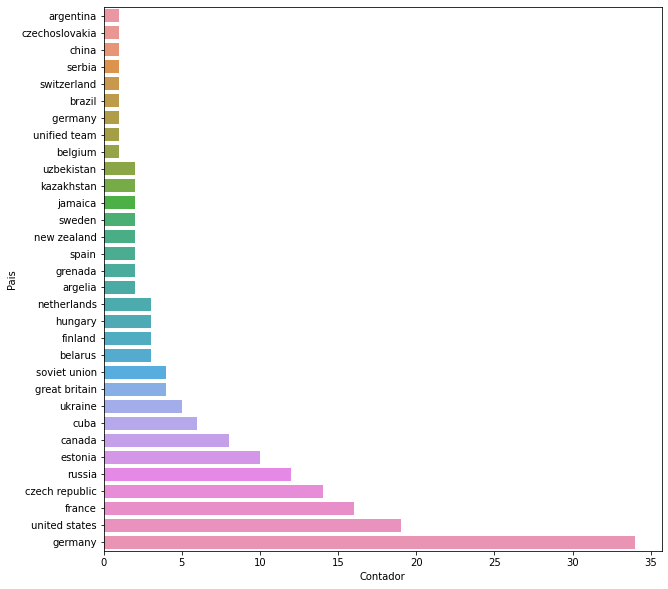

In [21]:
##################################################################################################
#################### Mejores paises entre los 10 mejores en WC ###################################
##################################################################################################

paises= []
contador= []
aux = 0

for i in range(len(ddbb)):
    if(ddbb.iloc[i]['Position'] <= 10 and ddbb.iloc[i]['Competition'] == 'WC'):
        if(ddbb.iloc[i]['Country'] not in paises):
            paises.append(ddbb.iloc[i]['Country'])
            contador.append(1)
        else:
            aux = paises.index(ddbb.iloc[i]['Country'])
            contador[aux] = contador[aux] + 1        

imp = pd.DataFrame({'Contador':contador,
                    'Pais':paises})

plt.figure(figsize=(10,10))
sns.barplot(x = 'Contador', y= 'Pais', data = imp, order=imp.sort_values('Contador').Pais)

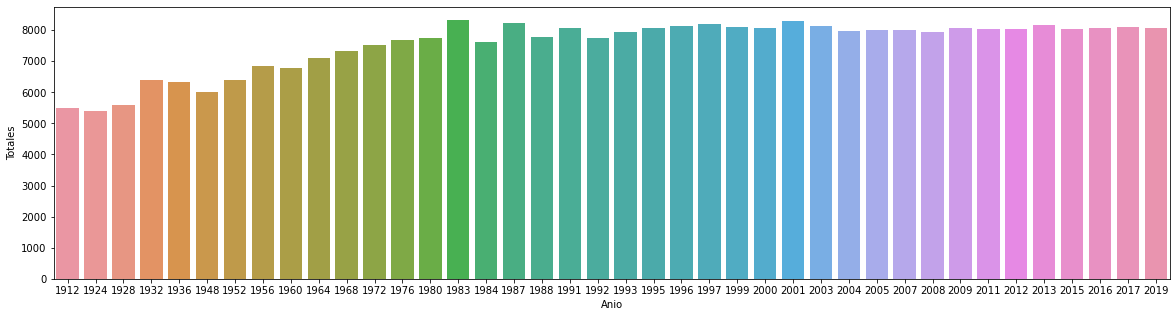

In [22]:
##################################################################################################
#################### Mejores WC teniendo en cuenta todos sus participantes #######################
##################################################################################################

anio = []
totales = []
nParticipantes = []

aux = 0

for i in range(len(ddbb)):
    if(ddbb.iloc[i]['Year'] not in anio):
        anio.append(ddbb.iloc[i]['Year'])
        totales.append(ddbb.iloc[i]['Total Points'])
        nParticipantes.append(1)
    else:
            aux = anio.index(ddbb.iloc[i]['Year'])
            totales[aux] = totales[aux] + ddbb.iloc[i]['Total Points'] 
            nParticipantes[aux] = nParticipantes[aux] +1
            
for i in range(len(totales)):
    totales[i] = totales[i] / nParticipantes[i]
    
    
imp = pd.DataFrame({'Anio':anio,
                    'Totales':totales})

plt.figure(figsize=(20,5))
sns.barplot(x = 'Anio', y= 'Totales', data=imp)

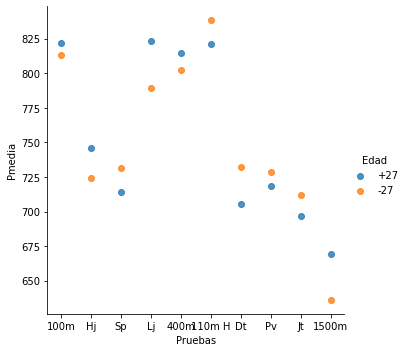

In [23]:
##################################################################################################
#################### Mejores pruebas de menos de 25 años #########################################
##################################################################################################

pMedia25 = [0,0,0,0,0,0,0,0,0,0]
pMedia40 = [0,0,0,0,0,0,0,0,0,0]

aux = 0
aux1 = 0

for i in range(len(ddbb)):
    if(i < 850 and ddbb.iloc[i]['Age'] >27):
        pMedia40[0] = pMedia40[0]+ ddbb.iloc[i]['100m Points']
        pMedia40[1] = pMedia40[1]+ ddbb.iloc[i]['Hj Points']
        pMedia40[2] = pMedia40[2]+ ddbb.iloc[i]['Sp Points']
        pMedia40[3] = pMedia40[3]+ ddbb.iloc[i]['Lj Points']
        pMedia40[4] = pMedia40[4]+ ddbb.iloc[i]['400m Points']
        pMedia40[5] = pMedia40[5]+ ddbb.iloc[i]['110m H Points']
        pMedia40[6] = pMedia40[6]+ ddbb.iloc[i]['Dt Points']
        pMedia40[7] = pMedia40[7]+ ddbb.iloc[i]['Pv Points']
        pMedia40[8] = pMedia40[8]+ ddbb.iloc[i]['Jt Points']
        pMedia40[9] = pMedia40[9]+ ddbb.iloc[i]['1500m Points']
       
        aux = aux + 1
    else:
        pMedia25[0] = pMedia25[0]+ ddbb.iloc[i]['100m Points']
        pMedia25[1] = pMedia25[1]+ ddbb.iloc[i]['Hj Points']
        pMedia25[2] = pMedia25[2]+ ddbb.iloc[i]['Sp Points']
        pMedia25[3] = pMedia25[3]+ ddbb.iloc[i]['Lj Points']
        pMedia25[4] = pMedia25[4]+ ddbb.iloc[i]['400m Points']
        pMedia25[5] = pMedia25[5]+ ddbb.iloc[i]['110m H Points']
        pMedia25[6] = pMedia25[6]+ ddbb.iloc[i]['Dt Points']
        pMedia25[7] = pMedia25[7]+ ddbb.iloc[i]['Pv Points']
        pMedia25[8] = pMedia25[8]+ ddbb.iloc[i]['Jt Points']
        pMedia25[9] = pMedia25[9]+ ddbb.iloc[i]['1500m Points']
        aux1 = aux1 + 1

for i in range(len(pMedia25)):
    pMedia25[i] = pMedia25[i]/aux1
    pMedia40[i] = pMedia40[i]/aux


pruebas = ['100m','Hj','Sp','Lj','400m','110m H','Dt','Pv','Jt','1500m',
          '100m','Hj','Sp','Lj','400m','110m H','Dt','Pv','Jt','1500m']
age = ['+27','+27','+27','+27','+27','+27','+27','+27','+27','+27',
      '-27','-27','-27','-27','-27','-27','-27','-27','-27','-27']

pMedias = np.concatenate((pMedia25, pMedia40))

imp = pd.DataFrame({'Pruebas': pruebas,
                    'Pmedia': pMedias,
                    'Edad': age})


sns.lmplot(x='Pruebas', y='Pmedia',hue = 'Edad', data=imp,
           fit_reg=False)

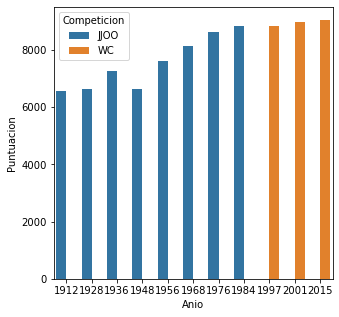

In [24]:
##################################################################################################
#################### Mejores puntaciones de cada decada ##########################################
##################################################################################################

puntuacion = [0,0,0,0,0,0,0,0,0,0,0]
atleta = [0,0,0,0,0,0,0,0,0,0,0]
anio = [0,0,0,0,0,0,0,0,0,0,0]
competicion = [0,0,0,0,0,0,0,0,0,0,0]

for i in range(len(ddbb)):
    if(ddbb.iloc[i]['Year'] < 1920 and ddbb.iloc[i]['Total Points'] > puntuacion[0]):
        puntuacion[0] = ddbb.iloc[i]['Total Points']
        atleta[0] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1920 and ddbb.iloc[i]['Year'] < 1930 and ddbb.iloc[i]['Total Points'] > puntuacion[1]):
        puntuacion[1] = ddbb.iloc[i]['Total Points']
        atleta[1] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1930 and ddbb.iloc[i]['Year'] < 1940 and ddbb.iloc[i]['Total Points'] > puntuacion[2]):
        puntuacion[2] = ddbb.iloc[i]['Total Points']
        atleta[2] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1940 and ddbb.iloc[i]['Year'] < 1950 and ddbb.iloc[i]['Total Points'] > puntuacion[3]):
        puntuacion[3] = ddbb.iloc[i]['Total Points']
        atleta[3] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1950 and ddbb.iloc[i]['Year'] < 1960 and ddbb.iloc[i]['Total Points'] > puntuacion[4]):
        puntuacion[4] = ddbb.iloc[i]['Total Points']
        atleta[4] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1960 and ddbb.iloc[i]['Year'] < 1970 and ddbb.iloc[i]['Total Points'] > puntuacion[5]):
        puntuacion[5] = ddbb.iloc[i]['Total Points']
        atleta[5] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1970 and ddbb.iloc[i]['Year'] < 1980 and ddbb.iloc[i]['Total Points'] > puntuacion[6]):
        puntuacion[6] = ddbb.iloc[i]['Total Points']
        atleta[6] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1980 and ddbb.iloc[i]['Year'] < 1990 and ddbb.iloc[i]['Total Points'] > puntuacion[7]):
        puntuacion[7] = ddbb.iloc[i]['Total Points']
        atleta[7] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1990 and ddbb.iloc[i]['Year'] < 2000 and ddbb.iloc[i]['Total Points'] > puntuacion[8]):
        puntuacion[8] = ddbb.iloc[i]['Total Points']
        atleta[8] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 2000 and ddbb.iloc[i]['Year'] < 2010 and ddbb.iloc[i]['Total Points'] > puntuacion[9]):
        puntuacion[9] = ddbb.iloc[i]['Total Points']
        atleta[9] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 2010 and ddbb.iloc[i]['Year'] < 2020 and ddbb.iloc[i]['Total Points'] > puntuacion[10]):
        puntuacion[10] = ddbb.iloc[i]['Total Points']
        atleta[10] = ddbb.iloc[i]

for i in range(len(atleta)):
    anio[i] = atleta[i]['Year']
    competicion[i] = atleta[i]['Competition']

    
imp = pd.DataFrame({'Anio': anio,
                    'Competicion': competicion,
                    'Puntuacion': puntuacion})


plt.figure(figsize=(5,5))
sns.barplot(x = 'Anio', y= 'Puntuacion',hue = 'Competicion', data=imp)

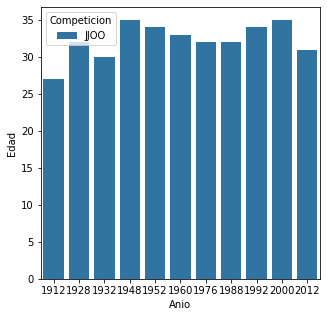

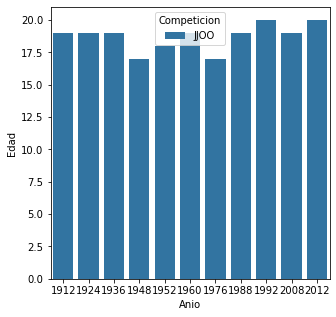

In [25]:
##################################################################################################
#################### Edad minima y maxima por decadas ############################################
##################################################################################################

edad = [0,0,0,0,0,0,0,0,0,0,0]
atleta = [0,0,0,0,0,0,0,0,0,0,0]
anio = [0,0,0,0,0,0,0,0,0,0,0]
competicion = [0,0,0,0,0,0,0,0,0,0,0]

for i in range(len(ddbb)):
    if(ddbb.iloc[i]['Year'] < 1920 and ddbb.iloc[i]['Age'] > edad[0]):
        edad[0] = ddbb.iloc[i]['Age']
        atleta[0] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1920 and ddbb.iloc[i]['Year'] < 1930 and ddbb.iloc[i]['Age'] > edad[1]):
        edad[1] = ddbb.iloc[i]['Age']
        atleta[1] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1930 and ddbb.iloc[i]['Year'] < 1940 and ddbb.iloc[i]['Age'] > edad[2]):
        edad[2] = ddbb.iloc[i]['Age']
        atleta[2] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1940 and ddbb.iloc[i]['Year'] < 1950 and ddbb.iloc[i]['Age'] > edad[3]):
        edad[3] = ddbb.iloc[i]['Age']
        atleta[3] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1950 and ddbb.iloc[i]['Year'] < 1960 and ddbb.iloc[i]['Age'] > edad[4]):
        edad[4] = ddbb.iloc[i]['Age']
        atleta[4] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1960 and ddbb.iloc[i]['Year'] < 1970 and ddbb.iloc[i]['Age'] > edad[5]):
        edad[5] = ddbb.iloc[i]['Age']
        atleta[5] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1970 and ddbb.iloc[i]['Year'] < 1980 and ddbb.iloc[i]['Age'] > edad[6]):
        edad[6] = ddbb.iloc[i]['Age']
        atleta[6] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1980 and ddbb.iloc[i]['Year'] < 1990 and ddbb.iloc[i]['Age'] > edad[7]):
        edad[7] = ddbb.iloc[i]['Age']
        atleta[7] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1990 and ddbb.iloc[i]['Year'] < 2000 and ddbb.iloc[i]['Age'] > edad[8]):
        edad[8] = ddbb.iloc[i]['Age']
        atleta[8] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 2000 and ddbb.iloc[i]['Year'] < 2010 and ddbb.iloc[i]['Age'] > edad[9]):
        edad[9] = ddbb.iloc[i]['Age']
        atleta[9] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 2010 and ddbb.iloc[i]['Year'] < 2020 and ddbb.iloc[i]['Age'] > edad[10]):
        edad[10] = ddbb.iloc[i]['Age']
        atleta[10] = ddbb.iloc[i]

for i in range(len(atleta)):
    anio[i] = atleta[i]['Year']
    competicion[i] = atleta[i]['Competition']

    
imp = pd.DataFrame({'Anio': anio,
                    'Competicion': competicion,
                    'Edad': edad})


plt.figure(figsize=(5,5))
sns.barplot(x = 'Anio', y= 'Edad',hue = 'Competicion', data=imp)

edad = [99,99,99,99,99,99,99,99,99,99,99]
atleta = [0,0,0,0,0,0,0,0,0,0,0]
anio = [0,0,0,0,0,0,0,0,0,0,0]
competicion = [0,0,0,0,0,0,0,0,0,0,0]

for i in range(len(ddbb)):
    if(ddbb.iloc[i]['Year'] < 1920 and ddbb.iloc[i]['Age'] < edad[0]):
        edad[0] = ddbb.iloc[i]['Age']
        atleta[0] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1920 and ddbb.iloc[i]['Year'] < 1930 and ddbb.iloc[i]['Age'] < edad[1]and ddbb.iloc[i]['Age']!=0):
        edad[1] = ddbb.iloc[i]['Age']
        atleta[1] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1930 and ddbb.iloc[i]['Year'] < 1940 and ddbb.iloc[i]['Age'] < edad[2]and ddbb.iloc[i]['Age']!=0):
        edad[2] = ddbb.iloc[i]['Age']
        atleta[2] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1940 and ddbb.iloc[i]['Year'] < 1950 and ddbb.iloc[i]['Age'] < edad[3]and ddbb.iloc[i]['Age']!=0):
        edad[3] = ddbb.iloc[i]['Age']
        atleta[3] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1950 and ddbb.iloc[i]['Year'] < 1960 and ddbb.iloc[i]['Age'] < edad[4]and ddbb.iloc[i]['Age']!=0):
        edad[4] = ddbb.iloc[i]['Age']
        atleta[4] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1960 and ddbb.iloc[i]['Year'] < 1970 and ddbb.iloc[i]['Age'] < edad[5]and ddbb.iloc[i]['Age']!=0):
        edad[5] = ddbb.iloc[i]['Age']
        atleta[5] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1970 and ddbb.iloc[i]['Year'] < 1980 and ddbb.iloc[i]['Age'] < edad[6]and ddbb.iloc[i]['Age']!=0):
        edad[6] = ddbb.iloc[i]['Age']
        atleta[6] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1980 and ddbb.iloc[i]['Year'] < 1990 and ddbb.iloc[i]['Age'] < edad[7]and ddbb.iloc[i]['Age']!=0):
        edad[7] = ddbb.iloc[i]['Age']
        atleta[7] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1990 and ddbb.iloc[i]['Year'] < 2000 and ddbb.iloc[i]['Age'] < edad[8]and ddbb.iloc[i]['Age']!=0):
        edad[8] = ddbb.iloc[i]['Age']
        atleta[8] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 2000 and ddbb.iloc[i]['Year'] < 2010 and ddbb.iloc[i]['Age'] < edad[9]and ddbb.iloc[i]['Age']!=0):
        edad[9] = ddbb.iloc[i]['Age']
        atleta[9] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 2010 and ddbb.iloc[i]['Year'] < 2020 and ddbb.iloc[i]['Age'] < edad[10]and ddbb.iloc[i]['Age']!=0):
        edad[10] = ddbb.iloc[i]['Age']
        atleta[10] = ddbb.iloc[i]

for i in range(len(atleta)):
    anio[i] = atleta[i]['Year']
    competicion[i] = atleta[i]['Competition']

    
imp = pd.DataFrame({'Anio': anio,
                    'Competicion': competicion,
                    'Edad': edad})


plt.figure(figsize=(5,5))
sns.barplot(x = 'Anio', y= 'Edad',hue = 'Competicion', data=imp)

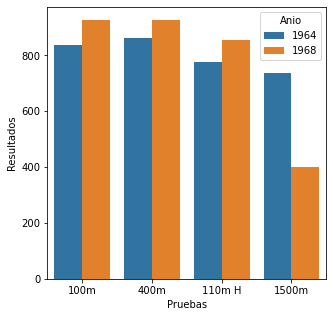

In [26]:
##################################################################################################
#################### Comparacion pista tierra y tarttan con los 3 mejores ########################
##################################################################################################

p1964 = []
p1968 = []
pruebas = []
total1964 = 0
total1968 = 0

anios = []
results = []
aux = 0
aux1 = 0


ddbbTrack = ddbb[['Athlete','Position','Year','100m Points','400m Points','110m H Points','1500m Points']]

for i in range(len(ddbbTrack)):
    if(ddbbTrack.iloc[i]['Year'] == 1964 and ddbbTrack.iloc[i]['Position'] <= 3):
        
        p1964.append(ddbbTrack.iloc[i]['100m Points'])
        anios.append('1964')
        pruebas.append('100m')
        p1964.append(ddbbTrack.iloc[i]['400m Points'])
        anios.append('1964')
        pruebas.append('400m')
        p1964.append(ddbbTrack.iloc[i]['110m H Points'])
        anios.append('1964')
        pruebas.append('110m H')
        p1964.append(ddbbTrack.iloc[i]['1500m Points'])
        anios.append('1964')
        pruebas.append('1500m')
        aux = aux +1
        
    if(ddbbTrack.iloc[i]['Year'] == 1968 and ddbbTrack.iloc[i]['Position'] <= 3):
       
        p1968.append(ddbbTrack.iloc[i]['100m Points'])
        anios.append('1968')
        pruebas.append('100m')
        p1968.append(ddbbTrack.iloc[i]['400m Points'])
        anios.append('1968')
        pruebas.append('400m')
        p1968.append(ddbbTrack.iloc[i]['110m H Points'])
        anios.append('1968')
        pruebas.append('110m H')
        p1968.append(ddbbTrack.iloc[i]['1500m Points'])
        anios.append('1968')
        pruebas.append('1500m')
        aux1 = aux1 +1

r = (p1964[0]+p1964[4]+p1964[8])/aux
results.append(r)

r = (p1964[1]+p1964[5]+p1964[9])/aux
results.append(r)

r = (p1964[2]+p1964[6]+p1964[10])/aux
results.append(r)

r = (p1964[3]+p1964[7]+p1964[11])/aux
results.append(r)


r = (p1968[0]+p1968[4]+p1968[8])/aux
results.append(r)

r = (p1968[1]+p1968[5]+p1968[9])/aux
results.append(r)

r = (p1968[2]+p1968[6]+p1968[10])/aux
results.append(r)

r = (p1968[3]+p1968[7]+p1968[11])/aux
results.append(r)

pruebas =['100m','400m','110m H','1500m','100m','400m','110m H','1500m']
anios = ['1964','1964','1964','1964','1968','1968','1968','1968']

imp = pd.DataFrame({'Pruebas': pruebas,
                    'Resultados': results,
                    'Anio': anios})


plt.figure(figsize=(5,5))
sns.barplot(x = 'Pruebas', y= 'Resultados',hue = 'Anio', data=imp)

El número de países participantes es 48


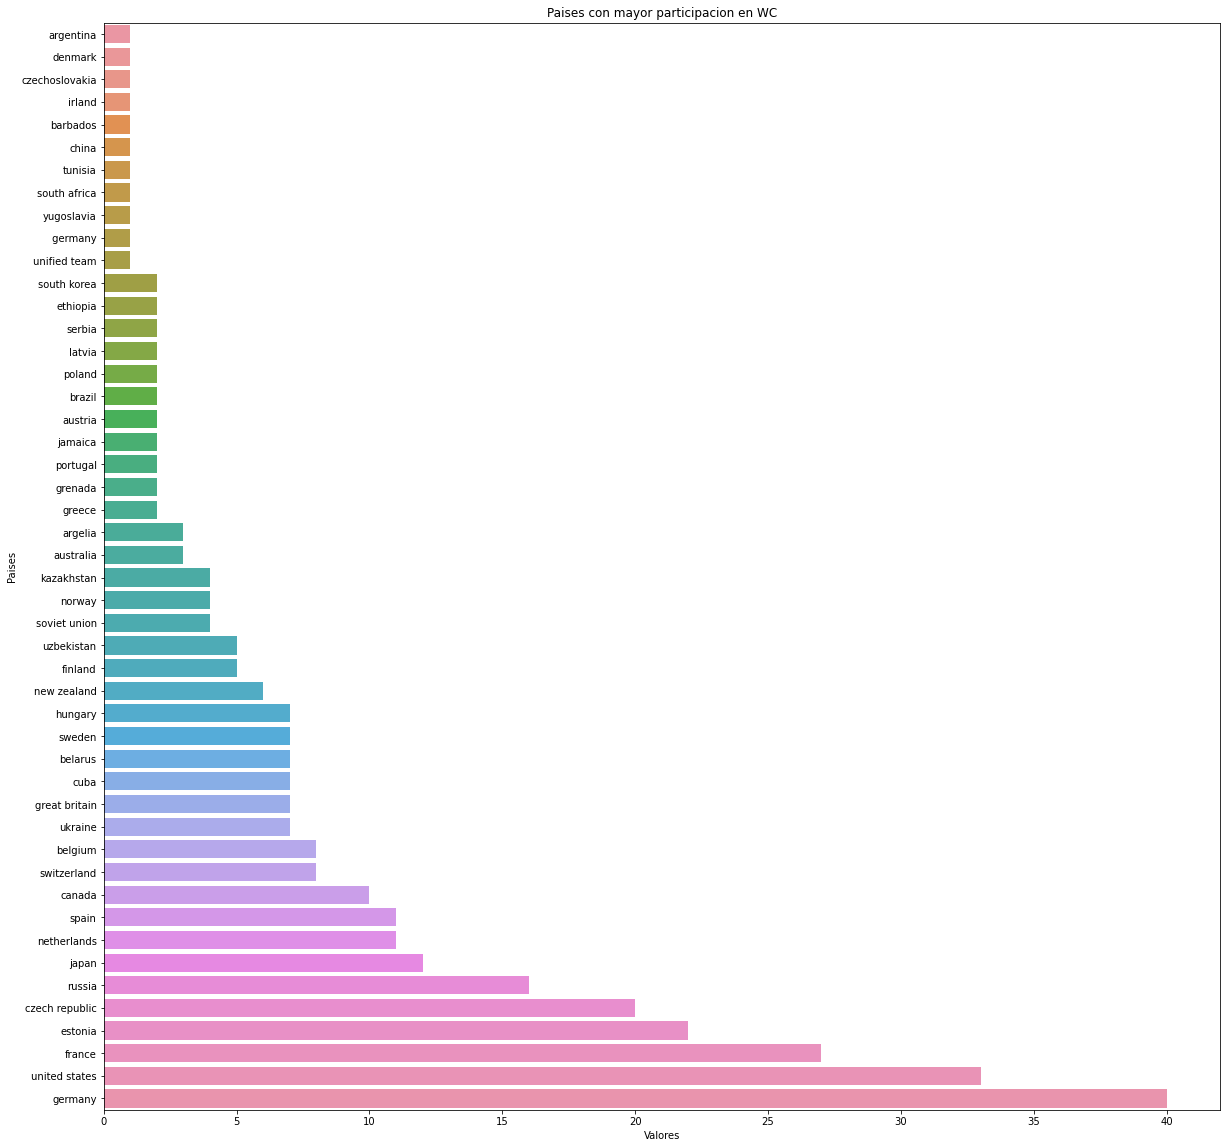

In [27]:
############################################################################
############# Paises con mayor participacion en WC #########################
############################################################################

paises = []
cantidad = []

aux = 0
cont = 0

for i in ddbb['Country']:
    if (i not in paises and ddbb.iloc[cont]['Competition'] == "WC" and ddbb.iloc[cont]['Year'] >= 1983):
        paises.append(i)
        cantidad.append(1)
    elif (i in paises and ddbb.iloc[cont]['Competition'] == "WC" and ddbb.iloc[cont]['Year'] >= 1983):
        aux = paises.index(i)
        cantidad[aux] = cantidad[aux] +1
    cont = cont +1
        
imp = pd.DataFrame({'Paises': paises, 'Valores': cantidad})


plt.figure(figsize=(20,20))
sns.barplot(x = 'Valores', y = 'Paises', data = imp, order=imp.sort_values('Valores').Paises).set_title('Paises con mayor participacion en WC')

print("El número de países participantes es",len(paises))

El número de países participantes es 65


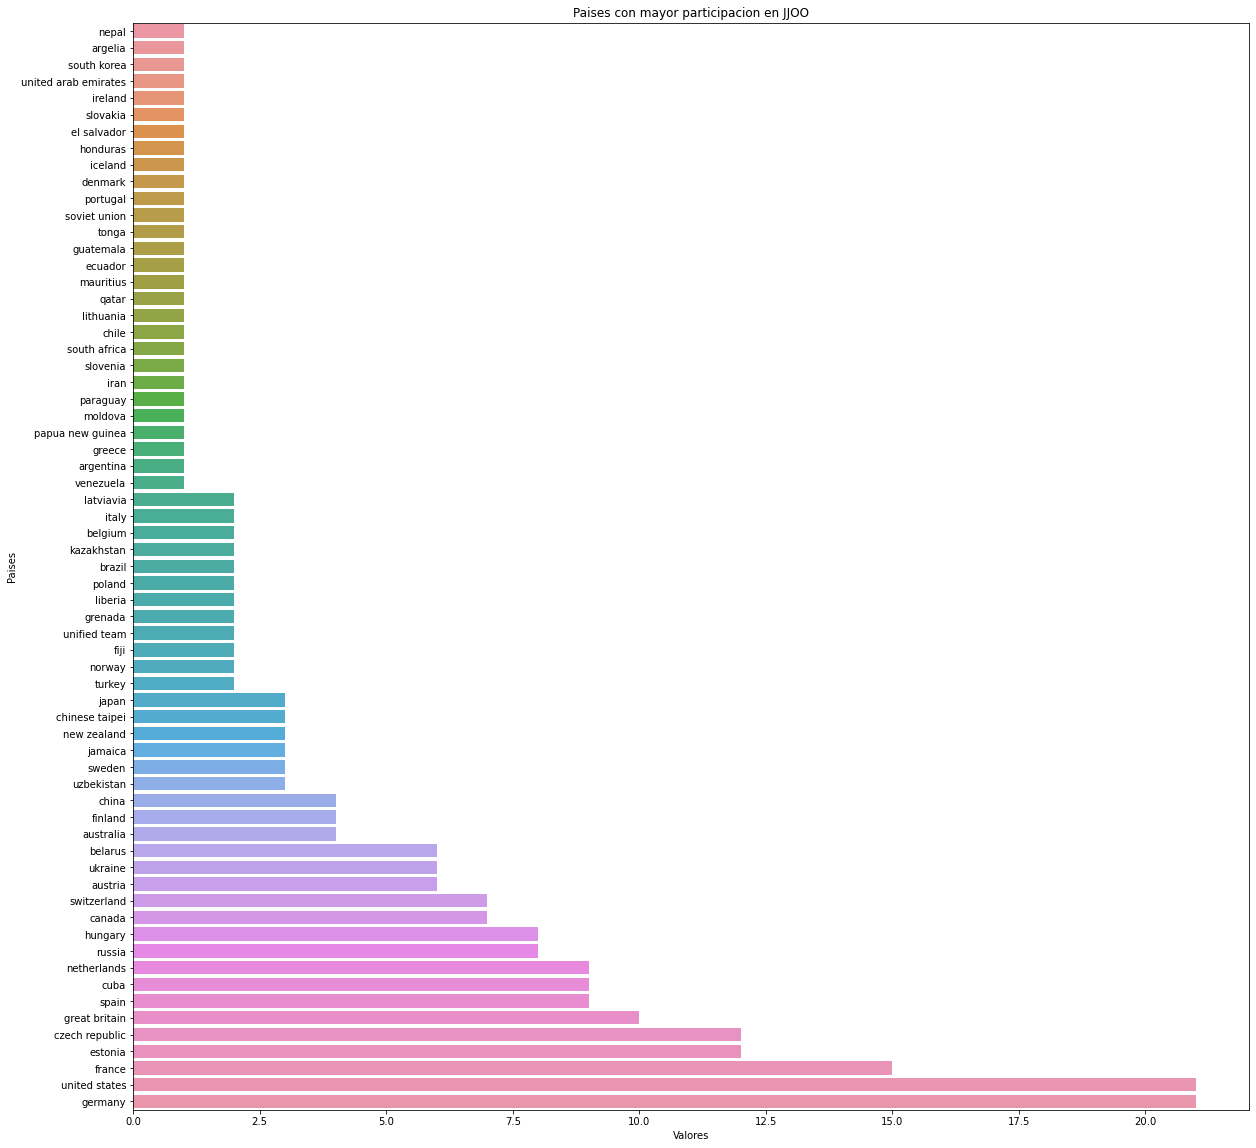

In [28]:
############################################################################
############# Paises con mayor participacion en JJOO #######################
############################################################################

paises = []
cantidad = []

aux = 0
cont = 0

for i in ddbb['Country']:
    if (i not in paises and ddbb.iloc[cont]['Competition'] == "JJOO" and ddbb.iloc[cont]['Year'] >= 1983):
        paises.append(i)
        cantidad.append(1)
    elif (i in paises and ddbb.iloc[cont]['Competition'] == "JJOO" and ddbb.iloc[cont]['Year'] >= 1983):
        aux = paises.index(i)
        cantidad[aux] = cantidad[aux] +1
    cont = cont +1
        
imp = pd.DataFrame({'Paises': paises, 'Valores': cantidad})


plt.figure(figsize=(20,20))
sns.barplot(x = 'Valores', y = 'Paises', data = imp, order=imp.sort_values('Valores').Paises).set_title('Paises con mayor participacion en JJOO')

print("El número de países participantes es",len(paises))

In [34]:
############################################################################
############# Ganadores con mejor y peor puntuacion JJOO ###################
############################################################################

mejor = 0
anioM = 0

peor = 20000
anioP = 0

peor1 = 20000
anioP1 = 0

for i in range(len(ddbb)):
    if(ddbb.iloc[i]['Competition'] == 'JJOO' and mejor < ddbb.iloc[i]['Total Points'] and ddbb.iloc[i]['Position'] == 1):
        mejor  = ddbb.iloc[i]['Total Points']
        anioM =  ddbb.iloc[i]['Year']
    if(ddbb.iloc[i]['Competition'] == 'JJOO' and peor > ddbb.iloc[i]['Total Points'] and ddbb.iloc[i]['Position'] == 1):
        peor  = ddbb.iloc[i]['Total Points']
        anioP =  ddbb.iloc[i]['Year']
    if(ddbb.iloc[i]['Competition'] == 'JJOO' and peor1 > ddbb.iloc[i]['Total Points'] and ddbb.iloc[i]['Position'] == 1 and
      ddbb.iloc[i]['Year'] >= 1980):
        peor1  = ddbb.iloc[i]['Total Points']
        anioP1 =  ddbb.iloc[i]['Year']


        
print("La mejor puntuacion con la que se han gnado unos JJOO es de",mejor,"En el año",anioM)
print("La peor puntuacion con la que se han gnado unos JJOO es de",peor,"En el año",anioP)
print("La peor puntuacion con la que se han gnado unos JJOO desde 1980 es de",peor1,"En el año",anioP1)

La mejor puntuacion con la que se han gnado unos JJOO es de 8893 En el año 2004
La peor puntuacion con la que se han gnado unos JJOO es de 6476 En el año 1924
La peor puntuacion con la que se han gnado unos JJOO desde 1980 es de 8488 En el año 1988


In [ ]:
############################################################################
############# Ganadores con mejor y peor puntuacion JJOO ###################
############################################################################

mejor = 0
anioM = 0

peor = 20000
anioP = 0

for i in range(len(ddbb)):
    if(ddbb.iloc[i]['Competition'] == 'JJOO' and mejor < ddbb.iloc[i]['Total Points'] and ddbb.iloc[i]['Position'] == 1):
        mejor  = ddbb.iloc[i]['Total Points']
        anioM =  ddbb.iloc[i]['Year']
    if(ddbb.iloc[i]['Competition'] == 'JJOO' and peor > ddbb.iloc[i]['Total Points'] and ddbb.iloc[i]['Position'] == 1):
        peor  = ddbb.iloc[i]['Total Points']
        anioP =  ddbb.iloc[i]['Year']


        
print("La mejor puntuacion con la que se han gnado unos JJOO es de",mejor,"En el año",anioM)
print("La peor puntuacion con la que se han gnado unos JJOO es de",peor,"En el año",anioP)
print("La peor puntuacion con la que se han gnado unos JJOO desde 1980 es de",peor1,"En el año",anioP1)